<a href="https://colab.research.google.com/github/dhruvmathur2001/Parkinson-Disease-Detection/blob/main/Parkinson_Disease_Detection_Model_using_Stacking_Technique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

In [2]:
# Load the dataset
data = pd.read_csv("/content/parkinsons.csv")

In [3]:
# Checking Presence of any Missing Value
data.isnull().sum()


,0
name,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0


In [4]:
data_req =  data.drop(columns=['name'])

In [5]:
# Outlier removal
z_scores = np.abs((data_req - data_req.mean()) / data_req.std())

threshold = 3

data_outliers_removed = data_req[(z_scores < threshold).all(axis=1)]

print("Original DataFrame:\n", data_req)
print("\nDataFrame without outliers:\n", data_outliers_removed)


Original DataFrame:
      MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134 

In [6]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)


In [7]:
# Split data into features (X) and target variable (y)
X = data_outliers_removed.drop(columns=['status'])
y = data_outliers_removed['status']

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# RFE using Random Forest classifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rfe = RFE(estimator=rf_classifier, n_features_to_select=10, step=1)

rfe.fit(X_train_scaled, y_train)

selected_features = X.columns[rfe.support_]

X_train_selected = rfe.transform(X_train_scaled)
X_test_selected = rfe.transform(X_test_scaled)

In [10]:
selected_features

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:RAP', 'Jitter:DDP',
       'MDVP:APQ', 'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [11]:
selected_features.shape

(10,)

In [12]:
df = pd.DataFrame(X_train_selected)
df

,0,1,2,3,4,5,6,7,8,9
0,1.732680,0.870949,-0.137823,-0.846325,-0.846777,-0.775909,-1.476786,-2.655126,-0.660653,-1.290849
1,-0.443816,-0.285916,-1.201638,1.529862,1.527834,0.353703,0.508869,-0.218067,-0.170774,0.404561
2,1.029080,0.394635,1.640349,-0.859135,-0.859589,-1.165373,-1.844395,-0.613365,-0.704526,-1.580904
3,-0.444833,-0.392840,0.269586,-0.961612,-0.959955,-0.853471,-0.711243,-0.864006,-0.879644,-0.699713
4,0.670124,0.188828,1.074283,-0.859135,-0.857454,-0.775909,-1.207199,-1.956739,0.027414,-0.986458
...,...,...,...,...,...,...,...,...,...,...
139,1.248883,0.565990,1.796528,0.639592,0.641626,-0.715674,-0.635674,-0.478193,0.426212,-0.726421
140,-0.068228,-0.338292,-0.980026,-0.942398,-0.940736,-0.766007,-0.270083,-0.242598,-0.640765,-0.302131
141,0.049492,-0.184908,-1.147610,-0.462036,-0.464533,0.486549,-0.416115,-0.433237,-0.589124,-0.419034
142,1.018103,3.367913,-1.001033,0.652402,0.650168,-0.483810,-0.908274,-0.196139,-0.603973,-0.891103


In [13]:
X_train_selected.shape

(144, 10)

Training with Individual Models

In [14]:
#SVM classifier
svm_classifier = SVC()

svm_classifier.fit(X_train_selected, y_train)

y_pred = svm_classifier.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred)

from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

print(f"SVM Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")



SVM Accuracy: 0.8648648648648649
Precision: 0.8709677419354839
Recall: 0.9642857142857143
F1-score: 0.9152542372881356


In [15]:
knn_classifier = KNeighborsClassifier(n_neighbors=15)

knn_classifier.fit(X_train_selected, y_train)

y_pred_knn = knn_classifier.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred_knn)

precision = precision_score(y_test, y_pred_knn)

recall = recall_score(y_test, y_pred_knn)

f1 = f1_score(y_test, y_pred_knn)

print(f"KNN Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


KNN Accuracy: 0.8378378378378378
Precision: 0.84375
Recall: 0.9642857142857143
F1-score: 0.9


In [16]:
# GaussianNB classifier
GNB_classifier = GaussianNB()

GNB_classifier.fit(X_train_selected, y_train)

y_pred_GNB = GNB_classifier.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred_GNB)

precision = precision_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

print(f"Gaussian naive Baiyes Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Gaussian naive Baiyes Accuracy: 0.8378378378378378
Precision: 0.8709677419354839
Recall: 0.9642857142857143
F1-score: 0.9152542372881356


In [17]:
#MLP Classifier
mlp_classifier = MLPClassifier()

mlp_classifier.fit(X_train_selected, y_train)

y_pred_mlp = mlp_classifier.predict(X_test_selected)

accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

precision = precision_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

print(f"MLP Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

MLP Accuracy: 0.8378378378378378
Precision: 0.8709677419354839
Recall: 0.9642857142857143
F1-score: 0.9152542372881356


In [18]:
#Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=150, random_state=42)

rf_classifier.fit(X_train_selected, y_train)

y_pred_rf = rf_classifier.predict(X_test_selected)

accuracy_rf = accuracy_score(y_test, y_pred_rf)

precision = precision_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.8378378378378378
Precision: 0.8709677419354839
Recall: 0.9642857142857143
F1-score: 0.9152542372881356


In [32]:
#Stacking Ensemble Model

from sklearn.model_selection import GridSearchCV

# Initialize base models
base_models = [
    SVC(probability=True, kernel='rbf', C=1.0),
    KNeighborsClassifier(n_neighbors=5),
    GaussianNB(),
    MLPClassifier(max_iter=500, hidden_layer_sizes=(100,), alpha=0.0001),

]

# Initialize meta model
meta_model = RandomForestClassifier(n_estimators=150, random_state=42)

# Initialize k-fold cross-validation
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize arrays to store meta-features
meta_features_train = np.zeros((len(y_train), len(base_models)))
meta_features_test = np.zeros((len(y_test), len(base_models)))

# Train base models with k-fold validation and grid search for hyperparameters
for i, model in enumerate(base_models):
     if isinstance(model, SVC):
        param_grid = {
            'C': [0.1, 1, 10],
            'kernel': ['rbf', 'linear'],
            'gamma': ['scale', 'auto']
        }
     elif isinstance(model, KNeighborsClassifier):
        param_grid = {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
     elif isinstance(model, GaussianNB):
        param_grid = {
            'var_smoothing': np.logspace(0, -9, num=100)
        }
     elif isinstance(model, MLPClassifier):
        param_grid = {
            'hidden_layer_sizes': [(50,), (100,), (150,)],
            'alpha': [0.0001, 0.001, 0.01],
            'learning_rate': ['constant', 'adaptive'],
            'solver': ['lbfgs', 'sgd', 'adam']
        }

    # grid search to find the best hyperparameters
     grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='accuracy')
     grid_search.fit(X_train_selected, y_train)

     best_model = grid_search.best_estimator_

    # Train the best model on the entire training data
     best_model.fit(X_train_selected, y_train)

    # Generate meta-features using the best model
     meta_features_train[:, i] = best_model.predict_proba(X_train_selected)[:, 1]
     meta_features_test[:, i] = best_model.predict_proba(X_test_selected)[:, 1]

# Train meta-model
meta_model.fit(meta_features_train, y_train)

# Make predictions using the stacked ensemble
stacked_predictions = meta_model.predict(meta_features_test)

# Evaluate stacked ensemble
accuracy = accuracy_score(y_test, stacked_predictions)
print(f"Stacked Ensemble Accuracy: {accuracy}")

Stacked Ensemble Accuracy: 0.918918918918919


In [33]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

In [34]:
conf_matrix = confusion_matrix(y_test, stacked_predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 8  1]
 [ 2 26]]


In [35]:
precision = precision_score(y_test, stacked_predictions)

recall = recall_score(y_test, stacked_predictions)

f1 = f1_score(y_test, stacked_predictions)

print(f"Stacked Ensemble Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Stacked Ensemble Accuracy: 0.918918918918919
Precision: 0.9629629629629629
Recall: 0.9285714285714286
F1-score: 0.9454545454545454


In [24]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, stacked_predictions)
roc_auc = auc(fpr, tpr)

In [36]:
roc_auc

0.9087301587301587

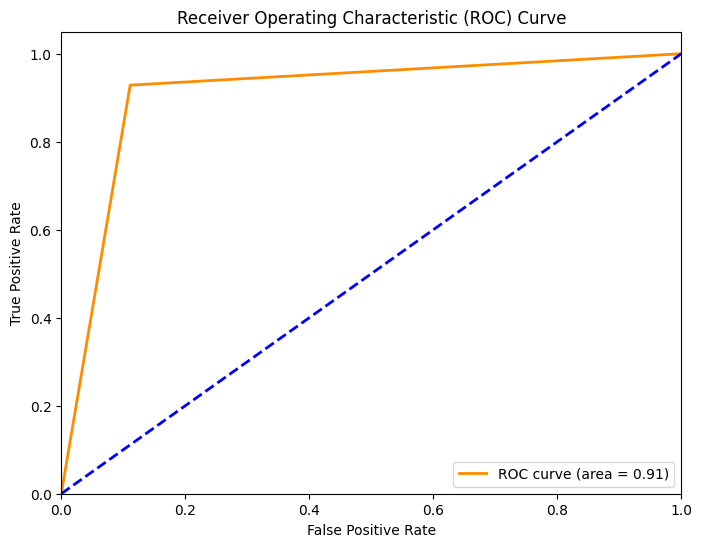

In [37]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


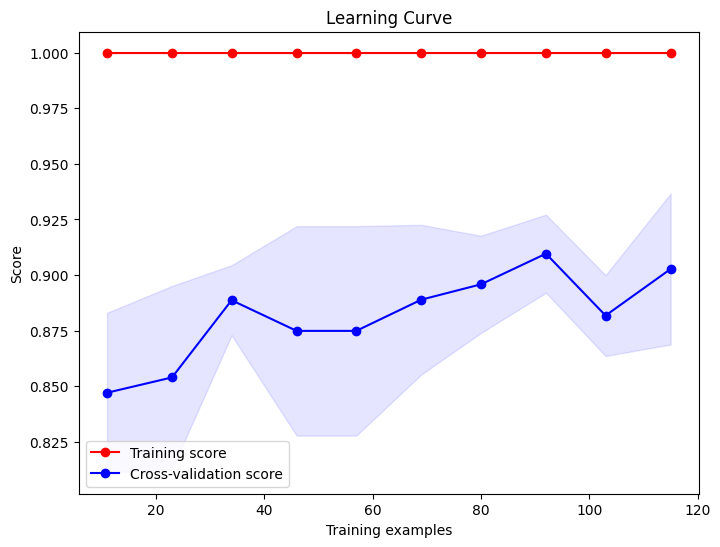

In [38]:
train_sizes, train_scores, test_scores = learning_curve(meta_model, X_train_selected, y_train, cv=kf,
                                                        train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="b")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="b", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

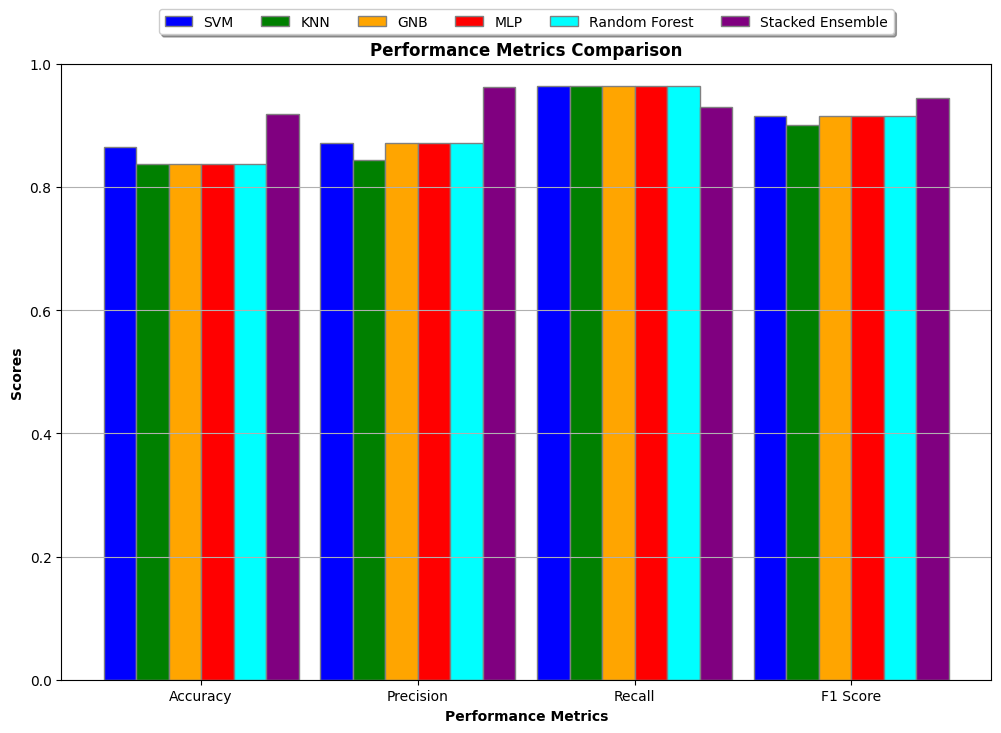

In [39]:

import matplotlib.pyplot as plt

# Models and their performance metrics
models = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

SVM = [0.865, 0.871, 0.964, 0.915]
KNN = [0.838, 0.844, 0.964, 0.900]
GNB = [0.838, 0.871, 0.964, 0.915]
MLP = [0.838, 0.871, 0.964, 0.915]
RF = [0.838, 0.871, 0.964, 0.915]
Stacked_Ensemble = [0.919, 0.963, 0.929, 0.945]

# Set the width of the bars
bar_width = 0.15

# Set the position of the bars on the x-axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]
r6 = [x + bar_width for x in r5]

# Plotting the bars
plt.figure(figsize=(12, 8))
plt.bar(r1, SVM, color='b', width=bar_width, edgecolor='grey', label='SVM')
plt.bar(r2, KNN, color='g', width=bar_width, edgecolor='grey', label='KNN')
plt.bar(r3, GNB, color='orange', width=bar_width, edgecolor='grey', label='GNB')
plt.bar(r4, MLP, color='r', width=bar_width, edgecolor='grey', label='MLP')
plt.bar(r5, RF, color='cyan', width=bar_width, edgecolor='grey', label='Random Forest')
plt.bar(r6, Stacked_Ensemble, color='purple', width=bar_width, edgecolor='grey', label='Stacked Ensemble')

# Adding labels and title
plt.xlabel('Performance Metrics', fontweight='bold')
plt.ylabel('Scores', fontweight='bold')
plt.title('Performance Metrics Comparison', fontweight='bold')

# Adding xticks
plt.xticks([r + 2.5 * bar_width for r in range(len(models))], models)

# Show plot
plt.ylim(0, 1)  # Set y-axis limits to range from 0 to 1
plt.grid(axis='y')  # Add gridlines only on the y-axis

# Create a separate legend above the graph
plt.legend(['SVM', 'KNN', 'GNB', 'MLP', 'Random Forest', 'Stacked Ensemble'], loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=True, ncol=6)

plt.show()


Predictive System

In [48]:
user_input = input("Enter 4 meta-feature values separated by commas: ")

input_pd_data = [float(x) for x in user_input.split(',')]

if len(input_pd_data) != 4:
    print("Error: You must enter exactly 4 feature values.")
else:
    input_pd_data_as_numpy_array = np.asarray(input_pd_data)
    input_data_reshaped = input_pd_data_as_numpy_array.reshape(1, -1)
    input_pd_data = input_data_reshaped

    print("Input data reshaped for model:", input_pd_data)

# Predict using the modified input data
prediction = meta_model.predict(input_pd_data)

print(prediction)
if prediction[0]==1:
  print("Patient has parkinson's disease")
else:
  print("Patient do not have parkinson's disease")

Enter 4 meta-feature values separated by commas: 0.9958326788198504,0.7309041923406518,0.952460434599811,0.9966269871061092
Input data reshaped for model: [[0.99583268 0.73090419 0.95246043 0.99662699]]
[1]
Patient has parkinson's disease
